In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [33]:
# Load dataset
df = pd.read_csv("water_potability.csv")

# Check shape & sample data
print("Shape:", df.shape)
df.head()


Shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [34]:
# Check nulls
df.isnull().sum()

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)


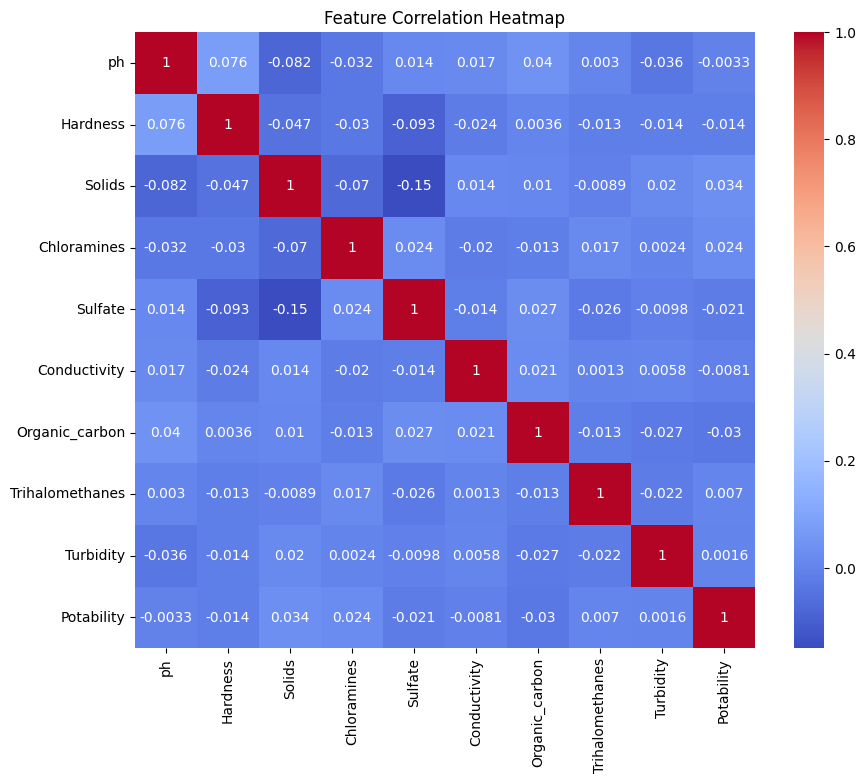

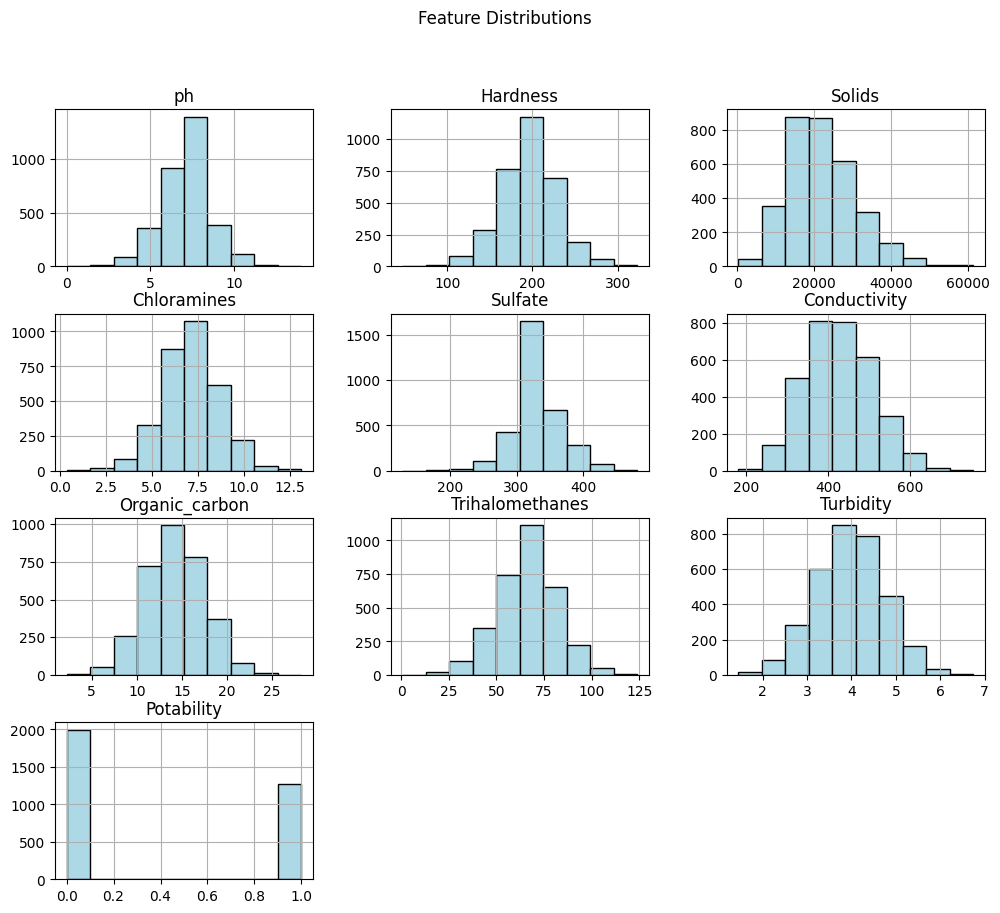

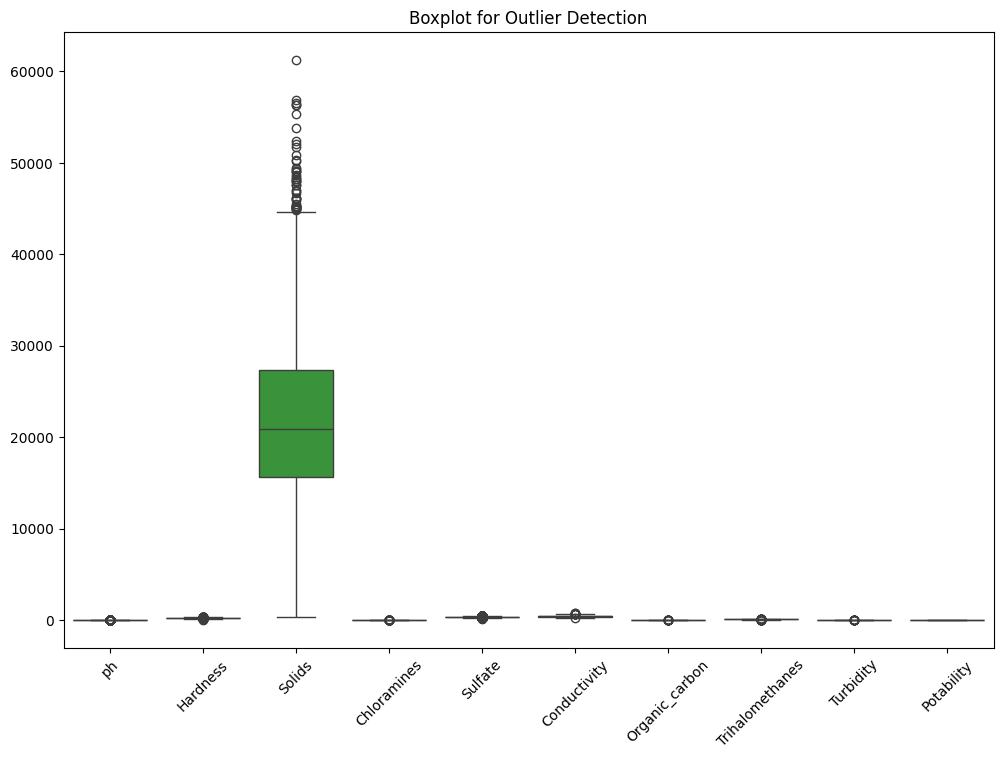

In [35]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Histograms
df.hist(figsize=(12,10), color='lightblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [36]:
X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)


In [38]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Show accuracies
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")


Logistic Regression Accuracy: 0.63
SVM Accuracy: 0.70
Random Forest Accuracy: 0.67


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.60      0.34      0.43       244

    accuracy                           0.67       656
   macro avg       0.65      0.60      0.60       656
weighted avg       0.66      0.67      0.64       656



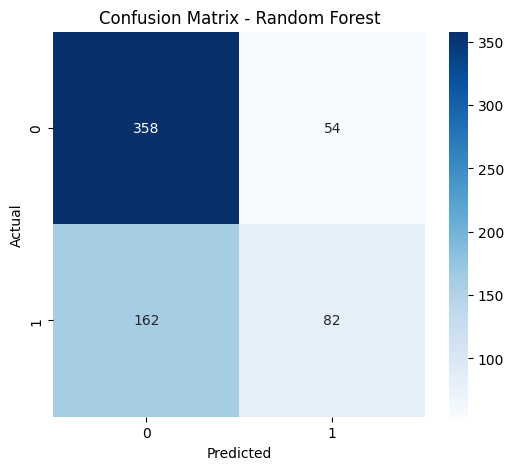

In [39]:
# Random Forest (best expected)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\durge\AppData\Local\Temp\ipykernel_18868\1111483686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


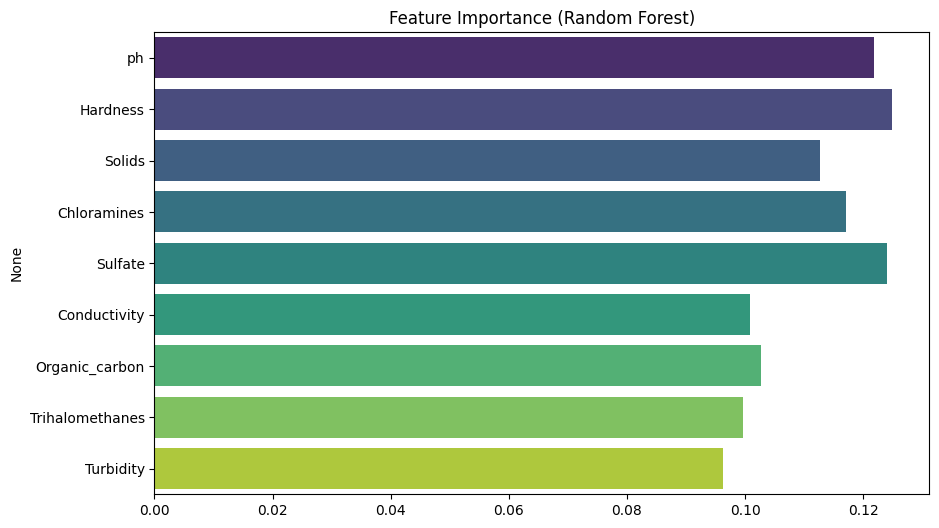

In [40]:
# Feature Importance
importances = rf.feature_importances_
features = df.drop('Potability', axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.6755725190839694


In [43]:

print("Water Quality Prediction Project Summary")
print(f"Total Samples: {df.shape[0]}, Features: {df.shape[1]-1}")
print()

print("Data Cleaning & Preprocessing Done:")
print("- Missing values filled with column mean.")
print("- Features scaled using StandardScaler.")
print()

print("Models Accuracy on Test Data:")
print(f"- Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"- Support Vector Machine Accuracy: {svm_acc:.2f}")
print(f"- Random Forest Accuracy: {rf_acc:.2f}")
print()

print("Best Model Hyperparameter Tuning Results:")
print(f"- Best Parameters: {grid_search.best_params_}")
print(f"- Best Cross-Validated Accuracy: {grid_search.best_score_:.2f}")
print()

print("Random Forest Feature Importance (Top):")
for feat, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"- {feat}: {imp:.3f}")
    
print()
print("Conclusion: Random Forest gives the best performance for predicting water potability in this project.")


Water Quality Prediction Project Summary
Total Samples: 3276, Features: 9

Data Cleaning & Preprocessing Done:
- Missing values filled with column mean.
- Features scaled using StandardScaler.

Models Accuracy on Test Data:
- Logistic Regression Accuracy: 0.63
- Support Vector Machine Accuracy: 0.70
- Random Forest Accuracy: 0.67

Best Model Hyperparameter Tuning Results:
- Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
- Best Cross-Validated Accuracy: 0.68

Random Forest Feature Importance (Top):
- Hardness: 0.125
- Sulfate: 0.124
- ph: 0.122
- Chloramines: 0.117
- Solids: 0.113
- Organic_carbon: 0.103
- Conductivity: 0.101
- Trihalomethanes: 0.100
- Turbidity: 0.096

Conclusion: Random Forest gives the best performance for predicting water potability in this project.
